___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" 
alt="CLRSWY"></p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:100%; text-align:center; border-radius:10px 10px;">WAY TO REINVENT YOURSELF</p>

<img src=https://i.ibb.co/wJW61Y2/Used-cars.jpg width="700" height="200">

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:200%; text-align:center; border-radius:10px 10px;">The Capstone Project of Data Analytics Module</p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:150%; text-align:center; border-radius:10px 10px;">Car Price Prediction EDA</p>

# WELCOME!

## Introduction
Welcome to "***AutoScout Data Analysis Project***". This is the capstone project of ***Data Analysis*** Module. **Auto Scout** data which using for this project, scraped from the on-line car trading company in 2019, contains many features of 9 different car models. In this project, you will have the opportunity to apply many commonly used algorithms for Data Cleaning and Exploratory Data Analysis by using many Python libraries such as Numpy, Pandas, Matplotlib, Seaborn, Scipy you will analyze clean dataset.

The project consists of 3 parts:
* First part is related with 'data cleaning'. It deals with Incorrect Headers, Incorrect Format, Anomalies, Dropping useless columns.
* Second part is related with 'filling data'. It deals with Missing Values. Categorical to numeric transformation is done.
* Third part is related with 'handling outliers of data' via Visualisation libraries. Some insights are extracted.


# PART- 1 `( Data Cleaning )`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

%matplotlib inline

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

pd.options.display.max_rows = 150
pd.options.display.max_columns = 100

In [2]:
import json

In [3]:
scout_car = pd.read_json ('scout_car.json', lines = True)
df = scout_car.copy()

In [4]:
df.head().T

,0,1,2,3,4
url,https://www.autoscout24.com//offers/audi-a1-sp...,https://www.autoscout24.com//offers/audi-a1-1-...,https://www.autoscout24.com//offers/audi-a1-sp...,https://www.autoscout24.com//offers/audi-a1-1-...,https://www.autoscout24.com//offers/audi-a1-sp...
make_model,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1
short_description,Sportback 1.4 TDI S-tronic Xenon Navi Klima,1.8 TFSI sport,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,1.4 TDi Design S tronic,Sportback 1.4 TDI S-Tronic S-Line Ext. admired...
body_type,Sedans,Sedans,Sedans,Sedans,Sedans
price,15770,14500,14640,14500,16790
vat,VAT deductible,Price negotiable,VAT deductible,None,None
km,"56,013 km","80,000 km","83,450 km","73,000 km","16,200 km"
registration,01/2016,03/2017,02/2016,08/2016,05/2016
prev_owner,2 previous owners,None,1 previous owner,1 previous owner,1 previous owner
kW,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            15919 non-null  object 
 1   make_model                     15919 non-null  object 
 2   short_description              15873 non-null  object 
 3   body_type                      15859 non-null  object 
 4   price                          15919 non-null  int64  
 5   vat                            11406 non-null  object 
 6   km                             15919 non-null  object 
 7   registration                   15919 non-null  object 
 8   prev_owner                     9091 non-null   object 
 9   kW                             0 non-null      float64
 10  hp                             15919 non-null  object 
 11  Type                           15917 non-null  object 
 12  Previous Owners                9279 non-null  

In [6]:
df.columns

Index(['url', 'make_model', 'short_description', 'body_type', 'price', 'vat',
       'km', 'registration', 'prev_owner', 'kW', 'hp', 'Type',
       'Previous Owners', 'Next Inspection', 'Inspection new', 'Warranty',
       'Full Service', 'Non-smoking Vehicle', 'null', 'Make', 'Model',
       'Offer Number', 'First Registration', 'Body Color', 'Paint Type',
       'Body Color Original', 'Upholstery', 'Body', 'Nr. of Doors',
       'Nr. of Seats', 'Model Code', 'Gearing Type', 'Displacement',
       'Cylinders', 'Weight', 'Drive chain', 'Fuel', 'Consumption',
       'CO2 Emission', 'Emission Class', '\nComfort & Convenience\n',
       '\nEntertainment & Media\n', '\nExtras\n', '\nSafety & Security\n',
       'description', 'Emission Label', 'Gears', 'Country version',
       'Electricity consumption', 'Last Service Date', 'Other Fuel Types',
       'Availability', 'Last Timing Belt Service Date', 'Available from'],
      dtype='object')

In [7]:
df.shape

(15919, 54)

In [8]:
# df.describe(include="object").T

#####  <span style='color:Yellow'>*As it can be seen above, there are several columns which are unnecessary, which have several null values or which contain meaningless data that cannot be processed. Some of these columns need to be deleted, some of them need to be cleaned for more clear data and in addition we should create new columns which include more explanatory data. We can begin with calculating the null values in each column.*</span> 

In [9]:
df.isna().sum().sort_values(ascending=False) # TOTAL NULL VALUES

kW                               15919
Last Timing Belt Service Date    15903
Electricity consumption          15782
Available from                   15647
Last Service Date                15353
Availability                     15284
Other Fuel Types                 15039
Next Inspection                  12384
Inspection new                   11987
Emission Label                   11934
Model Code                       10941
Non-smoking Vehicle               8742
Country version                   8333
Full Service                      7704
Weight                            6974
Drive chain                       6858
prev_owner                        6828
Previous Owners                   6640
Paint Type                        5772
Cylinders                         5680
Warranty                          5420
Gears                             4712
vat                               4513
Body Color Original               3759
Upholstery                        3720
Offer Number             

In [10]:
(df.isna().sum() * 100 / df.shape[0]).sort_values(ascending =False) # % VALUE OF NULL DATA

kW                              100.000
Last Timing Belt Service Date    99.899
Electricity consumption          99.139
Available from                   98.291
Last Service Date                96.445
Availability                     96.011
Other Fuel Types                 94.472
Next Inspection                  77.794
Inspection new                   75.300
Emission Label                   74.967
Model Code                       68.729
Non-smoking Vehicle              54.916
Country version                  52.346
Full Service                     48.395
Weight                           43.809
Drive chain                      43.081
prev_owner                       42.892
Previous Owners                  41.711
Paint Type                       36.259
Cylinders                        35.681
Warranty                         34.047
Gears                            29.600
vat                              28.350
Body Color Original              23.613
Upholstery                       23.368


#####  <span style='color:Yellow'>*As it is seen above, five column have a percentage above 90, one of which is 100 percent. Then the percentage rate suddenly decreases to 70s. So we can deduce that columns with a percentage rate above 90 can be deleted.*</span> 

In [11]:
def return_nans(df, limit):
    missing = (df.isna().sum())*100/(df.shape[0])
    return missing.loc[lambda x : x >= limit]

In [12]:
return_nans(df,90).sort_values(ascending=False)

kW                              100.000
Last Timing Belt Service Date    99.899
Electricity consumption          99.139
Available from                   98.291
Last Service Date                96.445
Availability                     96.011
Other Fuel Types                 94.472
dtype: float64

In [13]:
drop_nan = return_nans(df,90).index
drop_nan

Index(['kW', 'Electricity consumption', 'Last Service Date',
       'Other Fuel Types', 'Availability', 'Last Timing Belt Service Date',
       'Available from'],
      dtype='object')

In [14]:
df.drop(drop_nan,axis=1,inplace= True)

In [15]:
df.drop("null",axis=1,inplace=True)

#####  <span style='color:Yellow'>*So far we dropped below columns due to high percentage of null values(above 90 %) and a column named null*</span>
- kW 
- Electricity consumption
- Last Service Date
- Other Fuel Types
- Availability
- Last Timing Belt Service Date
- Available from  
-null

In [16]:
df.shape

(15919, 46)

In [17]:
df.columns

Index(['url', 'make_model', 'short_description', 'body_type', 'price', 'vat',
       'km', 'registration', 'prev_owner', 'hp', 'Type', 'Previous Owners',
       'Next Inspection', 'Inspection new', 'Warranty', 'Full Service',
       'Non-smoking Vehicle', 'Make', 'Model', 'Offer Number',
       'First Registration', 'Body Color', 'Paint Type', 'Body Color Original',
       'Upholstery', 'Body', 'Nr. of Doors', 'Nr. of Seats', 'Model Code',
       'Gearing Type', 'Displacement', 'Cylinders', 'Weight', 'Drive chain',
       'Fuel', 'Consumption', 'CO2 Emission', 'Emission Class',
       '\nComfort & Convenience\n', '\nEntertainment & Media\n', '\nExtras\n',
       '\nSafety & Security\n', 'description', 'Emission Label', 'Gears',
       'Country version'],
      dtype='object')

#####  <span style='color:Yellow'>*For consistency, we add '-' between the words in each column's name*</span>

In [18]:
df.columns = df.columns.str.replace(" ", "_")

In [19]:
df.columns

Index(['url', 'make_model', 'short_description', 'body_type', 'price', 'vat',
       'km', 'registration', 'prev_owner', 'hp', 'Type', 'Previous_Owners',
       'Next_Inspection', 'Inspection_new', 'Warranty', 'Full_Service',
       'Non-smoking_Vehicle', 'Make', 'Model', 'Offer_Number',
       'First_Registration', 'Body_Color', 'Paint_Type', 'Body_Color_Original',
       'Upholstery', 'Body', 'Nr._of_Doors', 'Nr._of_Seats', 'Model_Code',
       'Gearing_Type', 'Displacement', 'Cylinders', 'Weight', 'Drive_chain',
       'Fuel', 'Consumption', 'CO2_Emission', 'Emission_Class',
       '\nComfort_&_Convenience\n', '\nEntertainment_&_Media\n', '\nExtras\n',
       '\nSafety_&_Security\n', 'description', 'Emission_Label', 'Gears',
       'Country_version'],
      dtype='object')

###  <span style='color:Yellow'>EXAMINATION  AND CLEANING OF EACH COLUMN AND THEIR FEATURES</span>

###  <span style='color:Yellow'>url</span>

In [20]:
df.url.value_counts().head()

https://www.autoscout24.com//offers/audi-a1-sportback-1-4-tdi-s-tronic-xenon-navi-klima-diesel-black-bdab349a-caa5-41b0-98eb-c1345b84445e                  1
https://www.autoscout24.com//offers/opel-insignia-bus-inno-2-0-cdti-aut-navi-bi-xe-led-e6-diesel-black-8710b253-dd98-4ed0-9d46-cbad2d79532b                1
https://www.autoscout24.com//offers/opel-insignia-sport-tourer-opel-sport-tourer-1-6-cdti-136-ch-a-c-diesel-silver-10b7463b-9f56-4348-af35-df3432b2b585    1
https://www.autoscout24.com//offers/opel-insignia-2-0cdti-st-business-innovation-navi-bt-diesel-black-ba5a3368-dedc-4e51-9127-3976b26e93c2                 1
https://www.autoscout24.com//offers/opel-insignia-sport-tourer-opel-sport-tourer-1-6-cdti-136-ch-a-c-diesel-silver-7b52f054-78d3-4d5e-9370-8a7d081d7edd    1
Name: url, dtype: int64

#####  <span style='color:Yellow'>This column includes hyper links that we do not require at the moment and the links are not user friendly, we cannot see clearly which pages they reach. Therefore, we delete this column.</span>

In [21]:
df.drop("url",axis=1,inplace=True)

###  <span style='color:Yellow'>make_model</span>

In [22]:
df.make_model.value_counts(dropna=False)

Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2526
Opel Corsa        2219
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: make_model, dtype: int64

#####  <span style='color:Yellow'>"make_model" column seems clean and does not include any null values</span>

###  <span style='color:Yellow'>short_description</span>

In [23]:
df.short_description.value_counts(dropna=False)

SPB 1.6 TDI 116 CV S tronic Sport                 64
NaN                                               46
1.4 66kW (90CV) Selective                         40
MOVE KLIMA CD USB ALLWETTER BLUETOOTH             38
SPB 30 TDI S tronic Business                      35
                                                  ..
K Sports Tourer Business **Navi*Voll**             1
1.0 Turbo ecoFLEX Automatic Elective Park Navi     1
1.6 CDTI Business *Navi*Automatik*Spurh.*          1
1.6 136 CV Automatica Navi E 6 Garanzia Full       1
TCe 225 EDC GPF LIM Deluxe Pano,RFK                1
Name: short_description, Length: 10002, dtype: int64

In [24]:
df.drop("short_description",axis=1,inplace=True)

#####  <span style='color:Yellow'>"short_description" column gives a mixed and hard-to-understand features about the cars. So we can drop column and give some features in other columns and it will make ML processes and models harder </span>

###  <span style='color:Yellow'>body_type</span>

In [25]:
df.body_type.value_counts(dropna=False)

Sedans           7903
Station wagon    3553
Compact          3153
Van               783
Other             290
Transporter        88
NaN                60
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

#####  <span style='color:Yellow'>There are NaN values in "body-type" column</span>

###  <span style='color:Yellow'>vat</span>

In [26]:
df.vat.value_counts(dropna=False)

VAT deductible      10980
NaN                  4513
Price negotiable      426
Name: vat, dtype: int64

#####  <span style='color:Yellow'>There are NaN values in "vat" column</span>

###  <span style='color:Yellow'>km</span>

In [27]:
df.km.value_counts(dropna=False).sort_values(ascending=False)

10 km        1045
- km         1024
1 km          367
5 km          170
50 km         148
             ... 
36,980 km       1
36,818 km       1
46,398 km       1
59,535 km       1
57 km           1
Name: km, Length: 6690, dtype: int64

In [28]:
df.km.isnull().sum()

0

In [29]:
df.km.dtypes

dtype('O')

In [30]:
df['km'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1)

0       56013.000
1       80000.000
2       83450.000
3       73000.000
4       16200.000
           ...   
15911     100.000
15913    1000.000
15915    9900.000
15916      15.000
15917      10.000
Length: 14895, dtype: float64

#####  <span style='color:Yellow'>There are now only float values in "km" column</span>

<span style='color:Yellow'>BREAKDOWN</span>

<span style='color:Yellow'>1- .astype('str') First, we need to make sure that the entire column is a string in order to apply regex. This step is important if you have mixed data types in your column.</span>

<span style='color:Yellow'>2- .str.extractall('(\d+)') Using extract all, we can return every number from the string. The (\d)+ will look for any digit or any length in the string. The result ends up being a longer DataFrame where every match becomes its own row in a multi-index DataFrame.</span>

<span style='color:Yellow'>3- .unstack() This brings the matched numbers into the same row as the original string. Each grouping will be in a separate column.</span>

<span style='color:Yellow'>4- .fillna('') Since certain strings may have more matched groups than others, there may be NaN values in your DataFrame. This step removes them because otherwise, any operation that involves a NaN value results in NaN value.</span>

<span style='color:Yellow'>5- .sum(axis=1) Finally, to bring all the numbers together into one cell, we can run a sum. The axis=1 argument will sum the row values. The groupings are each stored as a string so it doesn’t add the numbers but will concatenate the numbers. The resulting column will be stored as a float data type.</span>

<span style='color:Yellow'>6- .astype(int) This last step is optional if you don’t want your number to be a float.</span>

In [31]:
# df.km.str.replace(',','').str.extract('(\d{1,8})') is another method for the solution

In [32]:
df['km'] = df['km'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1)

In [33]:
df['km'].value_counts(dropna=False)

10.000       1045
NaN          1024
1.000         367
5.000         170
50.000        148
             ... 
67469.000       1
43197.000       1
10027.000       1
35882.000       1
57.000          1
Name: km, Length: 6690, dtype: int64

In [34]:
df.km.isna().sum()

1024

#####  <span style='color:Yellow'>There are NaN values in "km" column</span>

###  <span style='color:Yellow'>registration</span>

In [35]:
df.registration.value_counts(dropna=False).head()

-/-        1597
03/2018     695
02/2019     585
05/2018     572
03/2019     543
Name: registration, dtype: int64

In [36]:
df.drop("registration",axis=1,inplace=True)

#####  <span style='color:Yellow'>"registration" column was dropped due to the lack of need for the irrelevant data</span>

###  <span style='color:Yellow'>prev_owner</span>

In [37]:
df.prev_owner.value_counts(dropna=False)

1 previous owner     8294
NaN                  6828
2 previous owners     778
3 previous owners      17
4 previous owners       2
Name: prev_owner, dtype: int64

In [38]:
df.drop("prev_owner",axis=1,inplace=True)

#####  <span style='color:Yellow'>"prev_owner" column was dropped due to the lack of need for the irrelevant data</span>

###  <span style='color:Yellow'>hp_kW</span>

In [39]:
df['hp'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1)

0        66.000
1       141.000
2        85.000
3        66.000
4        66.000
          ...  
15914   147.000
15915   165.000
15916   146.000
15917   147.000
15918   165.000
Length: 15831, dtype: float64

In [40]:
# df['hp_kW'] = df.hp.str.extract('(\d{1,8})')
df['hp_kW'] = df['hp'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1)

In [41]:
df['hp_kW']

0        66.000
1       141.000
2        85.000
3        66.000
4        66.000
          ...  
15914   147.000
15915   165.000
15916   146.000
15917   147.000
15918   165.000
Name: hp_kW, Length: 15919, dtype: float64

In [42]:
df.hp_kW.isna().sum()

88

#####  <span style='color:Yellow'>"hp_kW" column was created from "hp" column which only contains numbers. There are NaN values</span>

###  <span style='color:Yellow'>hp</span>

In [43]:
df.hp.value_counts(dropna=False).head()

85 kW     2542
66 kW     2122
81 kW     1402
100 kW    1308
110 kW    1112
Name: hp, dtype: int64

In [44]:
df.drop("hp",axis=1,inplace=True)

#####  <span style='color:Yellow'>"hp" column was dropped due to the lack of need</span>

###  <span style='color:Yellow'>Type</span>

In [45]:
df.Type.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[, Used, , Diesel (Particulate Filter)]                                                                                 3475
[, Used, , Diesel]                                                                                                      2516
[, Used, , Gasoline]                                                                                                    2367
[, Used, , Super 95]                                                                                                    1818
[, Pre-registered, , Super 95]                                                                                           500
                                                                                                                        ... 
[, New, , Regular/Benzine 91 / Super 95 / Super Plus 98 / Regular/Benzine E10 91 / Super Plus E10 98 / Super E10 95]       1
[, Used, , Super 95 / Super Plus 98 / Super E10 95 / Super Plus E10 98 (Particulate Filter)]                               1


In [46]:
df["Type"] = df.Type.str[1]  

In [47]:
df["Type"].value_counts(dropna=False)

Used              11096
New                1650
Pre-registered     1364
Employee's car     1011
Demonstration       796
NaN                   2
Name: Type, dtype: int64

In [48]:
df["Type"].isnull().sum()

2

#####  <span style='color:Yellow'>We onlytook the second values since we dont need fuel types from this column</span>

###  <span style='color:Yellow'>Fuel</span>

In [49]:
# One of the TRYINGS
# df['Fuel'] = [item[3] if type(item) == list else item for item in df["Type"]]
# df['Fuel'] = [item[1] if type(item) == list else item for item in df["Fuel"]]
# df['Fuel']=df['Fuel'].replace(r'\\n','', regex=True)

In [50]:
# Fuel Types
# "Diesel (Particulate Filter) ", "Super 95", "Gasoline", "Diesel", "Regular", "Benzine 91", "Super E10 95 ", "Super 95 (Particulate Filter)",
# "Benzine 91 (Particulate Filter)", "Super Plus 98", "Gasoline (Particulate Filter)", "Super Plus E10 98", "Benzine E10 91",
# "Super E10 95 (Particulate Filter)","Electric/Gasoline ", "Others", "Super Plus E10 98 (Particulate Filter)", "Electric",
# "Others (Particulate Filter)"
# ************************
# "CNG", "LPG", "CNG (Particulate Filter)", "Biogas", "Biodiesel", "Domestic gas H"

In [51]:
df.Fuel.value_counts(dropna=False).head()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n, Diesel (Particulate Filter), \n]      4315
[\n, Super 95, \n]                         3338
[\n, Gasoline, \n]                         3175
[\n, Diesel, \n]                           2984
[\n, Super 95 / Regular/Benzine 91, \n]     424
Name: Fuel, dtype: int64

In [52]:
df["Fuel"] = df.Fuel.str[1].str.split("/").str[0].str.strip()

In [53]:
df["Fuel"].value_counts(dropna=False)

Diesel (Particulate Filter)          4315
Super 95                             4100
Gasoline                             3175
Diesel                               2984
Regular                               503
Super E10 95                          402
Super 95 (Particulate Filter)         268
Gasoline (Particulate Filter)          77
CNG                                    33
LPG                                    16
Super Plus 98                          11
Liquid petroleum gas (LPG)             10
Super E10 95 (Particulate Filter)       7
Electric                                5
Others                                  5
CNG (Particulate Filter)                3
Super Plus E10 98                       2
Others (Particulate Filter)             1
Biogas                                  1
Domestic gas H                          1
Name: Fuel, dtype: int64

In [54]:
df["Fuel"] = df.Fuel.str.split("(").str[0].str.strip()

In [55]:
df["Fuel"].value_counts(dropna=False)

Diesel                  7299
Super 95                4368
Gasoline                3252
Regular                  503
Super E10 95             409
CNG                       36
LPG                       16
Super Plus 98             11
Liquid petroleum gas      10
Others                     6
Electric                   5
Super Plus E10 98          2
Biogas                     1
Domestic gas H             1
Name: Fuel, dtype: int64

In [56]:
benzine = ["Gasoline", "Super 95","Regular","Super E10 95","Super Plus 98","Super Plus E10 98", "Others"]
lpg = ["LPG","Liquid petroleum gas", "CNG", "Biogas", "Domestic gas H"]
def fueltype(x):
    if x in benzine:
        return "Benzine"
    elif x in lpg:
        return "LPG/CNG"
    else:
        return x
df["Fuel"] = df.Fuel.apply(fueltype)

In [57]:
df["Fuel"].value_counts(dropna=False)

Benzine     8551
Diesel      7299
LPG/CNG       64
Electric       5
Name: Fuel, dtype: int64

In [58]:
df.Fuel.isna().sum()

0

#####  <span style='color:Yellow'>First we took the fuel from uncleaned data, then took the first fuel among the ones separetd with/, then grouped them with a function</span>

###  <span style='color:Yellow'>Previous_Owners</span>

#####  <span style='color:Yellow'>Since we dropped prev_owners because it has more nan values, we will use this column</span>

In [59]:
df.Previous_Owners.value_counts(dropna=False).head()

\n1\n    8101
NaN      6640
\n2\n     766
\n0\n     163
\n3\n      17
Name: Previous_Owners, dtype: int64

In [60]:
df["Previous_Owners"] = [item[0] if type(item) == list else item for item in df["Previous_Owners"]]

In [61]:
df["Previous_Owners"]

0        \n2\n
1          NaN
2        \n1\n
3        \n1\n
4        \n1\n
         ...  
15914      NaN
15915    \n1\n
15916    \n1\n
15917      NaN
15918    \n1\n
Name: Previous_Owners, Length: 15919, dtype: object

In [62]:
df.Previous_Owners.str.split("/").str[0].str.strip().astype('float')

0       2.000
1         NaN
2       1.000
3       1.000
4       1.000
         ... 
15914     NaN
15915   1.000
15916   1.000
15917     NaN
15918   1.000
Name: Previous_Owners, Length: 15919, dtype: float64

In [63]:
df["Previous_Owners"]=df.Previous_Owners.str.split("/").str[0].str.strip().astype('float')

In [64]:
df["Previous_Owners"].value_counts(dropna=False)

1.000    8294
NaN      6640
2.000     778
0.000     188
3.000      17
4.000       2
Name: Previous_Owners, dtype: int64

###  <span style='color:Yellow'>Next_Inspection</span>

#####  <span style='color:Yellow'>Since we will use Inspection_new, we will drop this column</span>

In [65]:
df.Next_Inspection.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                       12384
\n04/2022\n                                  62
\n03/2021\n                                  38
\n03/2022\n                                  36
\n06/2021\n                                  34
                                          ...  
[\n12/2018\n, \n97 g CO2/km (comb)\n]         1
[\n03/2022\n, \n1 (No sticker)\n]             1
[\n05/2021\n, \n93 g CO2/km (comb)\n]         1
[\n06/2021\n, \n93 g CO2/km (comb)\n]         1
[\n01/2022\n, \n168 g CO2/km (comb)\n]        1
Name: Next_Inspection, Length: 1400, dtype: int64

In [66]:
df.drop("Next_Inspection",axis=1,inplace=True)

###  <span style='color:Yellow'>Inspection_new</span>

#####  <span style='color:Yellow'>We rearranged this column</span>

In [67]:
df.Inspection_new.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                                                                            11987
[\nYes\n, \nEuro 6\n]                                                                            523
\nYes\n                                                                                          362
[\nYes\n, \n102 g CO2/km (comb)\n]                                                               174
[\nYes\n, \n4 (Green)\n]                                                                         166
                                                                                               ...  
[\nYes\n, \n, 6 l/100 km (comb), \n, 8 l/100 km (city), \n, 4.9 l/100 km (country), \n]            1
[\nYes\n, \n, 6.8 l/100 km (comb), \n, 8.5 l/100 km (city), \n, 6.1 l/100 km (country), \n]        1
[\nYes\n, \n, 4.1 l/100 km (comb), \n, 7.5 l/100 km (city), \n, 5.2 l/100 km (country), \n]        1
[\nYes\n, \n, 5.2 l/100 km (comb), \n, 6.8 l/100 km (city), \n, 4.3 l/100 km (country), \n]

In [68]:
df['Inspection_new'] = [item[0] if type(item) == list else item for item in df["Inspection_new"]]
# df["Inspection_new"] = df["Inspection new"].apply(lambda item: item[0] if type(item) == list else item)

In [69]:
df["Inspection_new"] = df["Inspection_new"].str.strip("\n")

In [70]:
df["Inspection_new"].value_counts(dropna=False)

NaN    11987
Yes     3932
Name: Inspection_new, dtype: int64

###  <span style='color:Yellow'>Warranty</span>

In [71]:
df.Warranty.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                                                                                5420
[\n, \n, \nEuro 6\n]                                                                               1868
\n12 months\n                                                                                      1177
\n                                                                                                  979
\n24 months\n                                                                                       566
                                                                                                   ... 
[\n72 months\n, \n125 g CO2/km (comb)\n]                                                              1
[\n60 months\n, \n14 g CO2/km (comb)\n]                                                               1
[\n24 months\n, \n121 g CO2/km (comb)\n]                                                              1
[\n12 months\n, \nEuro 6d\n]                                    

In [72]:
df["Warranty"] = [x[0] if type(x) == list else x for x in df["Warranty"]]
# df["Warranty"] = df.Warranty.apply(lambda x : x[0] if type(x)==list else x)

In [73]:
df["Warranty"] = df.Warranty.str.strip("\n").str.extract('(\d{1,2})')[0].astype("float")

In [74]:
df["Warranty"].value_counts(dropna=False).head()

NaN       11066
12.000     2594
24.000     1118
60.000      401
36.000      279
Name: Warranty, dtype: int64

###  <span style='color:Yellow'>Full_Service</span>

#####  <span style='color:Yellow'>We dropped this column due to lack of need</span>

In [75]:
df.Full_Service.value_counts(dropna=False).head()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                           7704
[\n, \n, \n4 (Green)\n]       2235
[\n, \n, \nEuro 6\n]          2097
[\n, \n]                      1702
[\n, \n, \nEuro 6d-TEMP\n]     399
Name: Full_Service, dtype: int64

In [76]:
df.drop("Full_Service",axis=1,inplace=True)

###  <span style='color:Yellow'>Non-smoking_Vehicle</span>

#####  <span style='color:Yellow'>We dropped this column due to lack of need</span>

In [77]:
df['Non-smoking_Vehicle'].value_counts(dropna=False).head()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                           8742
[\n, \n]                      3647
[\n, \n, \n4 (Green)\n]       1240
[\n, \n, \nEuro 6\n]          1127
[\n, \n, \nEuro 6d-TEMP\n]     345
Name: Non-smoking_Vehicle, dtype: int64

In [78]:
df.drop('Non-smoking_Vehicle', axis=1, inplace=True)

###  <span style='color:Yellow'>Make</span>

#####  <span style='color:Yellow'>We dropped this column due to lack of need. We have same and more models in make_model column</span>

In [79]:
df.Make.value_counts(dropna=False)

\nOpel\n       7343
\nAudi\n       5712
\nRenault\n    2864
Name: Make, dtype: int64

In [80]:
# df["Make"] = df.Make.str.strip('\n') example code for taking only names

In [81]:
df.drop("Make", axis=1, inplace=True)

###  <span style='color:Yellow'>Model</span>

#####  <span style='color:Yellow'>We dropped this column due to lack of need. We have same and more models in make_model column</span>

In [82]:
df.Model.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n, A3, \n]          3097
[\n, A1, \n]          2614
[\n, Insignia, \n]    2598
[\n, Astra, \n]       2526
[\n, Corsa, \n]       2219
[\n, Clio, \n]        1839
[\n, Espace, \n]       991
[\n, Duster, \n]        34
[\n, A2, \n]             1
Name: Model, dtype: int64

In [83]:
# df["Model"] = df.Model.str[1] example code for taking only names

In [ ]:
df.drop("Model", axis=1, inplace=True)

###  <span style='color:Yellow'>Offer_Number</span>

#####  <span style='color:Yellow'>We dropped this column due to lack of need. The data is also meaningless</span>

In [ ]:
df['Offer_Number'].value_counts(dropna=False)

In [ ]:
df.drop("Offer_Number", axis=1, inplace=True)

###  <span style='color:Yellow'>First_Registration</span>

#####  <span style='color:Yellow'>We took this column because we dropped registraion column and this only involves years, easy to use. We will use this column to calculate the age of cars and drop them</span>

In [91]:
df['First_Registration'].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n, 2018, \n]    4522
[\n, 2016, \n]    3674
[\n, 2017, \n]    3273
[\n, 2019, \n]    2853
NaN               1597
Name: First_Registration, dtype: int64

In [92]:
df['First_Registration'].str[1].astype('float')

0       2016.000
1       2017.000
2       2016.000
3       2016.000
4       2016.000
          ...   
15914        NaN
15915   2019.000
15916   2019.000
15917   2019.000
15918   2019.000
Name: First_Registration, Length: 15919, dtype: float64

In [93]:
df['First_Registration'] = df['First_Registration'].str[1].astype('float')

In [94]:
df["First_Registration"].value_counts(dropna=False)

2018.000    4522
2016.000    3674
2017.000    3273
2019.000    2853
NaN         1597
Name: First_Registration, dtype: int64

In [95]:
df['age'] = 2019 - df['First_Registration']

In [96]:
df['age'].value_counts(dropna=False)

1.000    4522
3.000    3674
2.000    3273
0.000    2853
NaN      1597
Name: age, dtype: int64

In [97]:
df.drop(["First_Registration"], axis=1, inplace=True)

###  <span style='color:Yellow'>Body_Color</span>

In [98]:
df["Body_Color"].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n, Black, \n]     3745
[\n, Grey, \n]      3505
[\n, White, \n]     3406
[\n, Silver, \n]    1647
[\n, Blue, \n]      1431
[\n, Red, \n]        957
NaN                  597
[\n, Brown, \n]      289
[\n, Green, \n]      154
[\n, Beige, \n]      108
[\n, Yellow, \n]      51
[\n, Violet, \n]      18
[\n, Bronze, \n]       6
[\n, Orange, \n]       3
[\n, Gold, \n]         2
Name: Body_Color, dtype: int64

In [99]:
df['Body_Color'].str[1] 

0        Black
1          Red
2        Black
3        Brown
4        Black
         ...  
15914     Grey
15915     Grey
15916    White
15917     Grey
15918     Grey
Name: Body_Color, Length: 15919, dtype: object

In [100]:
df['Body_Color']=df['Body_Color'].str[1] 

In [101]:
df["Body_Color"].value_counts(dropna=False)

Black     3745
Grey      3505
White     3406
Silver    1647
Blue      1431
Red        957
NaN        597
Brown      289
Green      154
Beige      108
Yellow      51
Violet      18
Bronze       6
Orange       3
Gold         2
Name: Body_Color, dtype: int64

###  <span style='color:Yellow'>Body_Color_Original</span>

#####  <span style='color:Yellow'>Since Body_Color column is sufficient, we drop this column</span>

In [102]:
df['Body_Color_Original'].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                    3759
[\nOnyx Schwarz\n]                      338
[\nBianco\n]                            282
[\nMythosschwarz Metallic\n]            238
[\nBrillantschwarz\n]                   216
                                       ... 
[\nRouge-Braun (G0Y)\n]                   1
[\nVARI COLRI DISPONIBILI\n]              1
[\nKokosnussbraun Metallic\n]             1
[\nFarbe frei wählbar\n]                  1
[\nPerlmutt-Weiß Metallic (Weiß)\n]       1
Name: Body_Color_Original, Length: 1928, dtype: int64

In [103]:
df.drop(["Body_Color_Original"], axis=1, inplace=True)

###  <span style='color:Yellow'>Paint_Type</span>

#####  <span style='color:Yellow'>Since Body_Color column is sufficient, we drop this column</span>

In [104]:
df['Paint_Type'].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\nMetallic\n]       9794
NaN                  5772
[\nUni/basic\n]       347
[\nPerl effect\n]       6
Name: Paint_Type, dtype: int64

In [105]:
df.drop(["Paint_Type"], axis=1, inplace=True)

###  <span style='color:Yellow'>Upholstery</span>

#####  <span style='color:Yellow'>Upholstery is the work of providing furniture, especially seats, with padding, springs, webbing, and fabric or leather covers. The word also refers to the materials used to upholster something.WIKIPEDIA. Since 2 relevant column was created, Upholstery column was dropped</span>

In [106]:
df.Upholstery.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\nCloth, Black\n]           5821
NaN                          3720
[\nPart leather, Black\n]    1121
[\nCloth\n]                  1005
[\nCloth, Grey\n]             891
[\nCloth, Other\n]            639
[\nFull leather, Black\n]     575
[\nBlack\n]                   491
[\nGrey\n]                    273
[\nOther, Other\n]            182
[\nPart leather\n]            140
[\nFull leather\n]            139
[\nFull leather, Brown\n]     116
[\nPart leather, Grey\n]      116
[\nOther, Black\n]            110
[\nFull leather, Other\n]      72
[\nFull leather, Grey\n]       67
[\nPart leather, Other\n]      65
[\nOther\n]                    56
[\nPart leather, Brown\n]      50
[\nalcantara, Black\n]         47
[\nVelour, Black\n]            36
[\nFull leather, Beige\n]      36
[\nCloth, Brown\n]             28
[\nVelour\n]                   16
[\nOther, Grey\n]              15
[\nCloth, Beige\n]             13
[\nBrown\n]                    12
[\nCloth, Blue\n]              12
[\nVelour, Gre

In [107]:
# [item[0] if type(item) == list else item for item in df.Upholstery]

In [108]:
df['Upholstery'] = [item[0] if type(item) == list else item for item in df.Upholstery]

In [109]:
df.Upholstery.str.strip("\n")

0               Cloth, Black
1                Cloth, Grey
2               Cloth, Black
3                        NaN
4               Cloth, Black
                ...         
15914                    NaN
15915                  Cloth
15916    Full leather, Black
15917           Part leather
15918    Full leather, Brown
Name: Upholstery, Length: 15919, dtype: object

In [110]:
df.Upholstery.str.strip("\n").str.split(", ")

0               [Cloth, Black]
1                [Cloth, Grey]
2               [Cloth, Black]
3                          NaN
4               [Cloth, Black]
                 ...          
15914                      NaN
15915                  [Cloth]
15916    [Full leather, Black]
15917           [Part leather]
15918    [Full leather, Brown]
Name: Upholstery, Length: 15919, dtype: object

In [111]:
df["Upholstery"] = df.Upholstery.str.strip("\n").str.split(", ")

In [112]:
u_type = ["Cloth", 'Part leather', 'Full leather', 'Velour', 'alcantara']  # The most repeated unique data in the data set
# df["Upholstery_type"] = df["Upholstery"].apply(lambda x : x[0] if type(x) == list and x[0] in u_type else np.nan)
df["Upholstery_type"] = [item[0] if type(item) == list and item[0] in u_type else np.nan for item in df.Upholstery]

In [113]:
df["Upholstery_type"].value_counts(dropna=False)

Cloth           8423
NaN             4871
Part leather    1499
Full leather    1009
Velour            60
alcantara         57
Name: Upholstery_type, dtype: int64

In [114]:
color = ['Black', 'Grey', 'Brown', 'Beige', 'White', 'Blue', 'Red', 'Yellow', 'Orange']

def finder(x):
    if type(x) == list and len(x) == 2:
        return x[1]
    elif type(x) == list and x[0] in color:
        return x[0]
    else:
        return np.nan
    
df['Upholstery_color'] = df.Upholstery.apply(finder)

In [115]:
df["Upholstery_color"].value_counts(dropna=False)

Black     8201
NaN       5078
Grey      1376
Other      960
Brown      207
Beige       54
Blue        16
White       13
Red          9
Yellow       4
Orange       1
Name: Upholstery_color, dtype: int64

In [116]:
df.drop("Upholstery", axis=1, inplace=True)

###  <span style='color:Yellow'>Body</span>

#####  <span style='color:Yellow'>Since we have a Body_Type column with similar values, we drop this column</span>

In [117]:
df.Body.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n, Sedans, \n]           7903
[\n, Station wagon, \n]    3553
[\n, Compact, \n]          3153
[\n, Van, \n]               783
[\n, Other, \n]             290
[\n, Transporter, \n]        88
NaN                          60
[\n, Off-Road, \n]           56
[\n, Coupe, \n]              25
[\n, Convertible, \n]         8
Name: Body, dtype: int64

In [118]:
df.drop("Body", axis=1, inplace=True)

###  <span style='color:Yellow'>Nr._of_Doors</span>

In [119]:
df['Nr._of_Doors'].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n5\n]    11575
[\n4\n]     3079
[\n3\n]      832
[\n2\n]      219
NaN          212
[\n1\n]        1
[\n7\n]        1
Name: Nr._of_Doors, dtype: int64

In [120]:
df['Nr_of_Doors'] = df['Nr._of_Doors'].str[0].str.strip('\n').astype('float')

In [121]:
df["Nr_of_Doors"].value_counts(dropna=False)

5.000    11575
4.000     3079
3.000      832
2.000      219
NaN        212
1.000        1
7.000        1
Name: Nr_of_Doors, dtype: int64

In [122]:
df.drop("Nr._of_Doors", axis=1, inplace=True)

###  <span style='color:Yellow'>Nr._of_Seats</span>

In [123]:
df['Nr._of_Seats'].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n5\n]    13336
[\n4\n]     1125
NaN          977
[\n7\n]      362
[\n2\n]      116
[\n6\n]        2
[\n3\n]        1
Name: Nr._of_Seats, dtype: int64

In [124]:
df['Nr_of_Seats'] = df['Nr._of_Seats'].str[0].str.strip('\n').astype('float')

In [125]:
df["Nr_of_Seats"].value_counts(dropna=False)

5.000    13336
4.000     1125
NaN        977
7.000      362
2.000      116
6.000        2
3.000        1
Name: Nr_of_Seats, dtype: int64

In [126]:
df.drop("Nr._of_Seats", axis=1, inplace=True)

###  <span style='color:Yellow'>Model_Code</span>

#####  <span style='color:Yellow'>Since we don't need this column, we drop it</span>

In [127]:
df.Model_Code.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN               10941
[\n0035/BCB\n]      268
[\n0588/BNO\n]      245
[\n0588/BDB\n]      206
[\n0588/BHX\n]      188
                  ...  
[\n0035/AVN\n]        1
[\n0035/BEM\n]        1
[\n0035/BAG\n]        1
[\n0035/BAA\n]        1
[\n3333/BKG\n]        1
Name: Model_Code, Length: 233, dtype: int64

In [128]:
df.drop("Model_Code", axis=1, inplace=True)

###  <span style='color:Yellow'>Gearing_Type</span>

In [129]:
df.Gearing_Type.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n, Manual, \n]            8153
[\n, Automatic, \n]         7297
[\n, Semi-automatic, \n]     469
Name: Gearing_Type, dtype: int64

In [130]:
df['Gearing_Type'].str[1]

0        Automatic
1        Automatic
2        Automatic
3        Automatic
4        Automatic
           ...    
15914    Automatic
15915    Automatic
15916    Automatic
15917    Automatic
15918    Automatic
Name: Gearing_Type, Length: 15919, dtype: object

In [131]:
df['Gearing_Type']=df['Gearing_Type'].str[1]

In [132]:
df['Gearing_Type'].value_counts(dropna=False)

Manual            8153
Automatic         7297
Semi-automatic     469
Name: Gearing_Type, dtype: int64

###  <span style='color:Yellow'>Displacement</span>

In [133]:
df.Displacement.value_counts(dropna=False).head()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n1,598 cc\n]    4761
[\n999 cc\n]      2438
[\n1,398 cc\n]    1314
[\n1,399 cc\n]     749
[\n1,229 cc\n]     677
Name: Displacement, dtype: int64

In [134]:
df.Displacement.str[0].str.strip('\n').str.replace(',','').str.extract('(\d{1,5})')[0].astype("float")

0       1422.000
1       1798.000
2       1598.000
3       1422.000
4       1422.000
          ...   
15914   1997.000
15915   1798.000
15916   1997.000
15917   1997.000
15918   1798.000
Name: 0, Length: 15919, dtype: float64

In [135]:
df["Displacement"] = df.Displacement.str[0].str.strip('\n').str.replace(',','').str.extract('(\d{1,5})')[0].astype("float")

In [136]:
df["Displacement_cc"] = df["Displacement"]  # column name standardization

In [137]:
df["Displacement_cc"].value_counts(dropna=False).head()

1598.000    4761
999.000     2438
1398.000    1314
1399.000     749
1229.000     677
Name: Displacement_cc, dtype: int64

In [138]:
df.drop("Displacement", axis=1, inplace=True)

###  <span style='color:Yellow'>Cylinders</span>

In [139]:
df.Cylinders.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n4\n]    8105
NaN        5680
[\n3\n]    2104
[\n5\n]      22
[\n6\n]       3
[\n8\n]       2
[\n2\n]       2
[\n1\n]       1
Name: Cylinders, dtype: int64

In [140]:
df.Cylinders.str[0].str.strip('\n').astype("float")

0       3.000
1       4.000
2         NaN
3       3.000
4       3.000
         ... 
15914   4.000
15915   4.000
15916   4.000
15917   4.000
15918   4.000
Name: Cylinders, Length: 15919, dtype: float64

In [141]:
df["Cylinders"] = df.Cylinders.str[0].str.strip('\n').astype("float")

In [142]:
df["Cylinders"].value_counts(dropna=False)

4.000    8105
NaN      5680
3.000    2104
5.000      22
6.000       3
8.000       2
2.000       2
1.000       1
Name: Cylinders, dtype: int64

###  <span style='color:Yellow'>Weight</span>

In [143]:
df.Weight.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN               6974
[\n1,163 kg\n]     574
[\n1,360 kg\n]     356
[\n1,165 kg\n]     301
[\n1,335 kg\n]     242
                  ... 
[\n1,960 kg\n]       1
[\n1,258 kg\n]       1
[\n1,167 kg\n]       1
[\n1,331 kg\n]       1
[\n2,037 kg\n]       1
Name: Weight, Length: 435, dtype: int64

In [144]:
df.Weight.str[0].str.strip('\n').str.replace(',','').str.extract('(\d{1,6})')[0].astype('float')

0       1220.000
1       1255.000
2            NaN
3       1195.000
4            NaN
          ...   
15914   1758.000
15915   1708.000
15916        NaN
15917   1758.000
15918   1685.000
Name: 0, Length: 15919, dtype: float64

In [145]:
df["Weight_kg"] = df.Weight.str[0].str.strip('\n').str.replace(',','').str.extract('(\d{1,6})')[0].astype('float')

In [146]:
df["Weight_kg"].value_counts(dropna=False)

NaN         6974
1163.000     574
1360.000     356
1165.000     301
1335.000     242
            ... 
1960.000       1
1258.000       1
1167.000       1
1331.000       1
2037.000       1
Name: Weight_kg, Length: 435, dtype: int64

In [147]:
df.drop("Weight", axis=1, inplace=True)

###  <span style='color:Yellow'>Drive_chain</span>

In [148]:
df.Drive_chain.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\nfront\n]    8886
NaN            6858
[\n4WD\n]       171
[\nrear\n]        4
Name: Drive_chain, dtype: int64

In [149]:
df['Drive_chain'].str[0].str.strip('\n')

0        front
1        front
2        front
3          NaN
4        front
         ...  
15914    front
15915    front
15916    front
15917    front
15918      4WD
Name: Drive_chain, Length: 15919, dtype: object

In [150]:
df['Drive_chain'] = df['Drive_chain'].str[0].str.strip('\n')

In [151]:
df["Drive_chain"].value_counts(dropna=False)

front    8886
NaN      6858
4WD       171
rear        4
Name: Drive_chain, dtype: int64

###  <span style='color:Yellow'>Consumption </span>

In [152]:
df.Consumption.value_counts(dropna=False).head()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                                                         1906
[[3.9 l/100 km (comb)], [4.1 l/100 km (city)], [3.7 l/100 km (country)]]     304
[[4.2 l/100 km (comb)], [5 l/100 km (city)], [3.7 l/100 km (country)]]       276
[[5.4 l/100 km (comb)], [6.8 l/100 km (city)], [4.5 l/100 km (country)]]     257
[[3.8 l/100 km (comb)], [4.3 l/100 km (city)], [3.5 l/100 km (country)]]     253
Name: Consumption, dtype: int64

In [153]:
 # we need to consider each row in three different part, there are 3 lists in list

In [154]:
pd.DataFrame(df.Consumption)

,Consumption
0,"[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],..."
1,"[[5.6 l/100 km (comb)], [7.1 l/100 km (city)],..."
2,"[[3.8 l/100 km (comb)], [4.4 l/100 km (city)],..."
3,"[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],..."
4,"[[4.1 l/100 km (comb)], [4.6 l/100 km (city)],..."
...,...
15914,"[[5.3 l/100 km (comb)], [6.2 l/100 km (city)],..."
15915,"[\n, 7.4 l/100 km (comb), \n, 9.2 l/100 km (ci..."
15916,"[[5.3 l/100 km (comb)], [6.2 l/100 km (city)],..."
15917,"[[5.3 l/100 km (comb)], [6.2 l/100 km (city)],..."


In [155]:
# - if my row is list;
#     - I have three values in each of them if list
#     - I have 6 values -comma seperated- if my row does nor consist of lists
    
# - 1st part is combination consumption
# - 2nd part is city  consumption
# - 3rd part is country consumption

In [156]:
def parser1(x):
    if type(x) == float:
        return np.nan
    elif type(x[0]) == list:
        if x[0] != []:
            return x[0][0]
        else:
            return np.nan
    else:
        return x[1]

def parser2(x):
    if type(x) == float:
        return np.nan
    elif type(x[0]) == list:
        if x[1] != []:
            return x[1][0]
        else:
            return np.nan
    elif x[3].endswith(')'):
        return x[3]
    else:
        return np.nan

def parser3(x):
    if type(x) == float:
        return np.nan
    elif type(x[0]) == list:
        if x[2] != []:
            return x[2][0]
        else:
            return np.nan
    elif type(x[0]) != list and x[3].endswith(')'):
        return x[5]
    else:
        return np.nan

In [157]:
df['cons_comb'] = df.Consumption.apply(parser1).str.extract('(\d{1,2}.\d|\d{1,3})')[0].astype("float")
df['cons_city'] = df.Consumption.apply(parser2).str.extract('(\d{1,2}.\d|\d{1,3})')[0].astype("float")
df['cons_country'] = df.Consumption.apply(parser3).str.extract('(\d{1,2}.\d|\d{1,3})')[0].astype("float")

In [158]:
df["cons_comb"].value_counts(dropna=False).head()

NaN      2033
5.400     770
3.900     733
4.000     713
5.100     657
Name: cons_comb, dtype: int64

In [159]:
df.drop('Consumption', axis=1,inplace=True)

###  <span style='color:Yellow'>CO2_Emission</span>

In [160]:
df.CO2_Emission.value_counts(dropna=False).head()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                          1808
[\n120 g CO2/km (comb)\n]     740
[[], [], []]                  628
[\n99 g CO2/km (comb)\n]      545
[\n97 g CO2/km (comb)\n]      537
Name: CO2_Emission, dtype: int64

In [161]:
# [item[0] if type(item) == list else item for item in df["CO2_Emission"]]

In [162]:
df["CO2_Emission"] = [item[0] if type(item) == list else item for item in df["CO2_Emission"]]

In [163]:
df["CO2_Emission"].str.strip("\n").str.rstrip(" g CO2/km (comb)").str.replace(",", ".").astype("float")

0        99.000
1       129.000
2        99.000
3        99.000
4       109.000
          ...  
15914   139.000
15915   168.000
15916   139.000
15917   139.000
15918   153.000
Name: CO2_Emission, Length: 15919, dtype: float64

In [164]:
df["CO2_Emission"] = df["CO2_Emission"].str.strip("\n").str.rstrip(" g CO2/km (comb)").str.replace(",", ".").astype("float")

In [165]:
df["CO2_Emission"].value_counts(dropna=False).head()

NaN        2436
120.000     740
99.000      545
97.000      537
104.000     501
Name: CO2_Emission, dtype: int64

###  <span style='color:Yellow'>Emission_Class</span>

In [166]:
df.Emission_Class.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\nEuro 6\n]          10139
NaN                    3021
[\nEuro 6d-TEMP\n]     1845
[[], [], []]            607
[\nEuro 6c\n]           127
[\nEuro 5\n]             78
[\nEuro 6d\n]            62
[\nEuro 4\n]             40
Name: Emission_Class, dtype: int64

In [167]:
# [item[0] if type(item) == list else item for item in df["Emission_Class"]]

In [168]:
df["Emission_Class"] = [item[0] if type(item) == list else item for item in df["Emission_Class"]]

In [169]:
df["Emission_Class"].str.strip("\n")

0              Euro 6
1              Euro 6
2              Euro 6
3              Euro 6
4              Euro 6
             ...     
15914             NaN
15915             NaN
15916    Euro 6d-TEMP
15917          Euro 6
15918          Euro 6
Name: Emission_Class, Length: 15919, dtype: object

In [170]:
df["Emission_Class"] = df["Emission_Class"].str.strip("\n")

In [171]:
df["Emission_Class"].value_counts(dropna=False)  # rename ol unique values, like grouping

Euro 6          10139
NaN              3628
Euro 6d-TEMP     1845
Euro 6c           127
Euro 5             78
Euro 6d            62
Euro 4             40
Name: Emission_Class, dtype: int64

In [172]:
df.replace({"Emission_Class" : {"Euro 6d-TEMP":"Euro 6", "Euro 6c":"Euro 6", "Euro 6d":"Euro 6"}}, regex = True, inplace = True)

In [173]:
df["Emission_Class"].value_counts(dropna=False)

Euro 6    12173
NaN        3628
Euro 5       78
Euro 4       40
Name: Emission_Class, dtype: int64

###  <span style='color:Yellow'>\nComfort_&_Convenience\n</span>

In [174]:
df['\nComfort_&_Convenience\n'].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          920
[Air conditioning, Electrical side mirrors, Hill Holder, Power windows]                                                                                                                                                                                                                                                                                                                                                                                                                                

In [175]:
df.rename(columns = {'\nComfort_&_Convenience\n':'Comfort_Convenience'}, inplace = True)

In [176]:
# [",".join(item) if type(item) == list else item for item in df["Comfort_Convenience"]]  # join together al values inside each rows

In [177]:
df["Comfort_Convenience"] = [",".join(item) if type(item) == list else item for item in df["Comfort_Convenience"]] 

In [178]:
df["Comfort_Convenience"].value_counts(dropna=False).head()

NaN                                                                                                                                                                                                                                                                                                                                                   920
Air conditioning,Electrical side mirrors,Hill Holder,Power windows                                                                                                                                                                                                                                                                                    216
Air conditioning,Electrical side mirrors,Power windows                                                                                                                                                                                                                                                              

###  <span style='color:Yellow'>\nEntertainment_&_Media\n</span>

In [179]:
df['\nEntertainment_&_Media\n'].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                                                                                           1374
[Bluetooth, Hands-free equipment, On-board computer, Radio, USB]                                              1282
[Bluetooth, Hands-free equipment, MP3, On-board computer, Radio, USB]                                          982
[Bluetooth, CD player, Hands-free equipment, MP3, On-board computer, Radio, USB]                               783
[On-board computer, Radio]                                                                                     487
                                                                                                              ... 
[Bluetooth, CD player, Digital radio, Hands-free equipment, Radio]                                               1
[CD player, Hands-free equipment, MP3, Radio, USB]                                                               1
[MP3, Radio, Sound system, USB]                                                 

In [180]:
df.rename(columns = {'\nEntertainment_&_Media\n':'Entertainment_Media'}, inplace = True)

In [181]:
# [",".join(item) if type(item) == list else item for item in df["Entertainment_Media"]]  # join all values with comma in each row

In [182]:
df["Entertainment_Media"] = [",".join(item) if type(item) == list else item for item in df["Entertainment_Media"]]

In [183]:
df["Entertainment_Media"].value_counts(dropna=False).head()

NaN                                                                         1374
Bluetooth,Hands-free equipment,On-board computer,Radio,USB                  1282
Bluetooth,Hands-free equipment,MP3,On-board computer,Radio,USB               982
Bluetooth,CD player,Hands-free equipment,MP3,On-board computer,Radio,USB     783
On-board computer,Radio                                                      487
Name: Entertainment_Media, dtype: int64

###  <span style='color:Yellow'>\nExtras\n</span>

In [184]:
df['\nExtras\n'].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[Alloy wheels]                                                                                                     3245
NaN                                                                                                                2962
[Alloy wheels, Touch screen]                                                                                        697
[Alloy wheels, Voice Control]                                                                                       577
[Alloy wheels, Touch screen, Voice Control]                                                                         541
                                                                                                                   ... 
[Alloy wheels, Catalytic Converter, Shift paddles, Sport package, Sport seats, Sport suspension, Voice Control]       1
[Alloy wheels, Catalytic Converter, Roof rack, Sport package, Sport seats, Trailer hitch]                             1
[Alloy wheels, Catalytic Converter, Ski 

In [185]:
df.rename(columns = {'\nExtras\n':'Extras'}, inplace = True)

In [186]:
df["Extras"].apply(lambda item: ",".join(item) if type(item) == list else item)

0           Alloy wheels,Catalytic Converter,Voice Control
1        Alloy wheels,Sport seats,Sport suspension,Voic...
2                               Alloy wheels,Voice Control
3                   Alloy wheels,Sport seats,Voice Control
4        Alloy wheels,Sport package,Sport suspension,Vo...
                               ...                        
15914                            Alloy wheels,Touch screen
15915              Alloy wheels,Touch screen,Voice Control
15916                                         Alloy wheels
15917                            Alloy wheels,Touch screen
15918                            Alloy wheels,Touch screen
Name: Extras, Length: 15919, dtype: object

In [187]:
df["Extras"].apply(lambda item: ",".join(item) if type(item) == list else item).value_counts(dropna = False).head()

Alloy wheels                               3245
NaN                                        2962
Alloy wheels,Touch screen                   697
Alloy wheels,Voice Control                  577
Alloy wheels,Touch screen,Voice Control     541
Name: Extras, dtype: int64

In [188]:
df["Extras"] = [",".join(item) if type(item) == list else item for item in df["Extras"]]

In [189]:
df["Extras"].value_counts(dropna = False).head()%autoawait

NameError: name 'autoawait' is not defined

###  <span style='color:Yellow'>\nSafety_&_Security\n</span>

In [190]:
df['\nSafety_&_Security\n'].value_counts(dropna = False).head()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                                                                                                                                                                                                                                                       982
[ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Fog lights, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control]                                538
[ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control]                                            480
[ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure moni

In [191]:
df.rename(columns = {'\nSafety_&_Security\n':'Safety_Security'}, inplace = True)

In [192]:
df["Safety_Security"] = [",".join(item) if type(item) == list else item for item in df["Safety_Security"]]

In [193]:
df["Safety_Security"].value_counts(dropna=False).head()

NaN                                                                                                                                                                                                                                                        982
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Fog lights,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control                               538
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control                                          480
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control,Xenon headlights         

###  <span style='color:Yellow'>description</span>

#####  <span style='color:Yellow'>Too much and mixed info to use, we drop this column</span>

In [194]:
df.description.value_counts(dropna=False).head(1)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[]    636
Name: description, dtype: int64

In [195]:
df.drop("description", axis = 1, inplace = True)

###  <span style='color:Yellow'>Emission_Label</span>

#####  <span style='color:Yellow'>We do not need this column</span>

In [196]:
df.Emission_Label.value_counts(dropna=False).head()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                     11934
[\n4 (Green)\n]          3553
[\n1 (No sticker)\n]      381
[[], [], []]               40
[\n5 (Blue)\n]              8
Name: Emission_Label, dtype: int64

In [197]:
df.drop("Emission_Label", axis = 1, inplace = True)

###  <span style='color:Yellow'>Gears</span>

#####  <span style='color:Yellow'>We do not need this column</span>

In [198]:
df["Gears"].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n6\n]     5822
NaN         4712
[\n5\n]     3239
[\n7\n]     1908
[\n8\n]      224
[\n9\n]        6
[\n1\n]        2
[\n3\n]        2
[\n4\n]        2
[\n2\n]        1
[\n50\n]       1
Name: Gears, dtype: int64

In [199]:
df.Gears.str[0].str.strip('\n')

0        NaN
1          7
2        NaN
3          6
4        NaN
        ... 
15914      6
15915      7
15916      6
15917      6
15918    NaN
Name: Gears, Length: 15919, dtype: object

In [200]:
df["Gears"] = df.Gears.str[0].str.strip('\n')

In [201]:
df["Gears"].value_counts(dropna=False)

6      5822
NaN    4712
5      3239
7      1908
8       224
9         6
1         2
3         2
4         2
2         1
50        1
Name: Gears, dtype: int64

###  <span style='color:Yellow'>Country_version</span>

In [202]:
df["Country_version"].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                     8333
[\nGermany\n]           4502
[\nItaly\n]             1038
[\nEuropean Union\n]     507
[\nNetherlands\n]        464
[\nSpain\n]              325
[\nBelgium\n]            314
[\nAustria\n]            208
[\nCzech Republic\n]      52
[\nPoland\n]              49
[\nFrance\n]              38
[\nDenmark\n]             33
[\nHungary\n]             28
[\nJapan\n]                8
[\nSlovakia\n]             4
[\nCroatia\n]              4
[\nSweden\n]               3
[\nRomania\n]              2
[\nBulgaria\n]             2
[\nLuxembourg\n]           1
[\nSwitzerland\n]          1
[\nSlovenia\n]             1
[\nEgypt\n]                1
[\nSerbia\n]               1
Name: Country_version, dtype: int64

In [203]:
df.Country_version.str[0].str.strip('\n')

0            NaN
1            NaN
2            NaN
3            NaN
4        Germany
          ...   
15914        NaN
15915    Germany
15916    Austria
15917        NaN
15918    Germany
Name: Country_version, Length: 15919, dtype: object

In [204]:
df["Country_version"] = df.Country_version.str[0].str.strip('\n')

In [205]:
df["Country_version"].value_counts(dropna=False)

NaN               8333
Germany           4502
Italy             1038
European Union     507
Netherlands        464
Spain              325
Belgium            314
Austria            208
Czech Republic      52
Poland              49
France              38
Denmark             33
Hungary             28
Japan                8
Slovakia             4
Croatia              4
Sweden               3
Romania              2
Bulgaria             2
Luxembourg           1
Switzerland          1
Slovenia             1
Egypt                1
Serbia               1
Name: Country_version, dtype: int64

In [206]:
# It is difficulto to relate this column to the price column and there are so many nan values. 
# Therefore we drop it

In [207]:
df.drop("Country_version", axis = 1, inplace = True)

###  <span style='color:Yellow'>price(target column)</span>

#####  <span style='color:Yellow'>Since this is the target column, it is the most important one. Nothing if not, we are doing this EDA for price forecasting ML models </span>

In [208]:
df.price.isnull().sum()  # is there any null value?

0

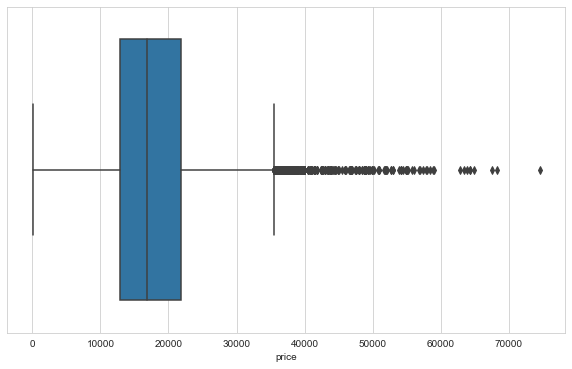

In [209]:
sns.boxplot(df.price);  
# Maybe there are outlier prices in our dataset. Let's check if outlier price. But not every outlier means you should get rid of it

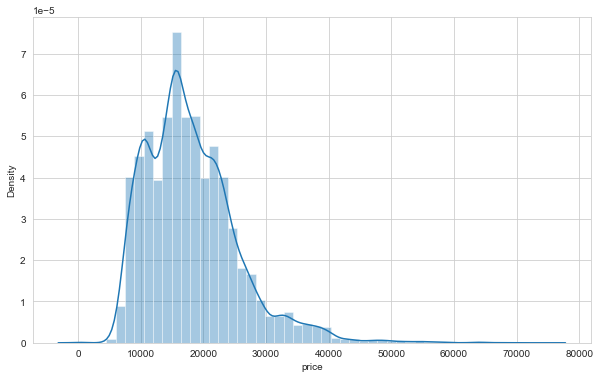

In [210]:
sns.distplot(df.price);  
# A right-skewed distribution of prices

In [211]:
df.price.describe()  # mean is bigger than 50% (median), reason for the right-skewness

count   15919.000
mean    18019.897
std      7386.169
min        13.000
25%     12850.000
50%     16900.000
75%     21900.000
max     74600.000
Name: price, dtype: float64

###  <span style='color:Yellow'>The End of Part 1-Data Cleaning</span>

In [212]:
df.shape

(15919, 32)

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15919 non-null  object 
 1   body_type            15859 non-null  object 
 2   price                15919 non-null  int64  
 3   vat                  11406 non-null  object 
 4   km                   14895 non-null  float64
 5   Type                 15917 non-null  object 
 6   Previous_Owners      9279 non-null   float64
 7   Inspection_new       3932 non-null   object 
 8   Warranty             4853 non-null   float64
 9   Body_Color           15322 non-null  object 
 10  Gearing_Type         15919 non-null  object 
 11  Cylinders            10239 non-null  float64
 12  Drive_chain          9061 non-null   object 
 13  Fuel                 15919 non-null  object 
 14  CO2_Emission         13483 non-null  float64
 15  Emission_Class       12291 non-null 

In [214]:
df.to_csv("clean_scout.csv", index=False)